In [1]:

from warnings import filterwarnings
filterwarnings('ignore')
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from math import radians, cos, sin, sqrt, asin
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
import copy
from scipy.stats import shapiro
from scipy import stats
from sklearn.linear_model import LinearRegression
from statsmodels.formula.api import ols
import statsmodels
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
from statsmodels.tools.eval_measures import rmse

In [2]:
plt.rcParams['figure.figsize'] = [15,8]
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [3]:
df = pd.read_csv('bodyfat.csv')
df.head()

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7


In [4]:
df1=copy.deepcopy(df)
df.shape

(252, 15)

In [5]:
df.dtypes

Density    float64
BodyFat    float64
Age          int64
Weight     float64
Height     float64
Neck       float64
Chest      float64
Abdomen    float64
Hip        float64
Thigh      float64
Knee       float64
Ankle      float64
Biceps     float64
Forearm    float64
Wrist      float64
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Density  252 non-null    float64
 1   BodyFat  252 non-null    float64
 2   Age      252 non-null    int64  
 3   Weight   252 non-null    float64
 4   Height   252 non-null    float64
 5   Neck     252 non-null    float64
 6   Chest    252 non-null    float64
 7   Abdomen  252 non-null    float64
 8   Hip      252 non-null    float64
 9   Thigh    252 non-null    float64
 10  Knee     252 non-null    float64
 11  Ankle    252 non-null    float64
 12  Biceps   252 non-null    float64
 13  Forearm  252 non-null    float64
 14  Wrist    252 non-null    float64
dtypes: float64(14), int64(1)
memory usage: 29.7 KB


In [7]:
df.nunique()

Density    218
BodyFat    176
Age         51
Weight     197
Height      48
Neck        90
Chest      174
Abdomen    185
Hip        152
Thigh      139
Knee        90
Ankle       61
Biceps     104
Forearm     77
Wrist       44
dtype: int64

In [8]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Density,252.0,1.055574,0.019031,0.995,1.0414,1.0549,1.0704,1.1089
BodyFat,252.0,19.150794,8.368740,0.000,12.4750,19.2000,25.3000,47.5000
Age,252.0,44.884921,12.602040,22.000,35.7500,43.0000,54.0000,81.0000
Weight,252.0,178.924405,29.389160,118.500,159.0000,176.5000,197.0000,363.1500
Height,252.0,70.148810,3.662856,29.500,68.2500,70.0000,72.2500,77.7500
Neck,252.0,37.992063,2.430913,31.100,36.4000,38.0000,39.4250,51.2000
Chest,252.0,100.824206,8.430476,79.300,94.3500,99.6500,105.3750,136.2000
Abdomen,252.0,92.555952,10.783077,69.400,84.5750,90.9500,99.3250,148.1000
Hip,252.0,99.904762,7.164058,85.000,95.5000,99.3000,103.5250,147.7000
Thigh,252.0,59.405952,5.249952,47.200,56.0000,59.0000,62.3500,87.3000


In [9]:
df.isnull().sum()

Density    0
BodyFat    0
Age        0
Weight     0
Height     0
Neck       0
Chest      0
Abdomen    0
Hip        0
Thigh      0
Knee       0
Ankle      0
Biceps     0
Forearm    0
Wrist      0
dtype: int64

In [10]:
X = df[df.columns.drop('BodyFat')]
y = df1['BodyFat']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [11]:
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)

RandomForestRegressor()

In [12]:
rf.feature_importances_

array([9.79481673e-01, 6.35123314e-04, 2.88048178e-03, 2.40575103e-03,
       6.96758656e-04, 2.37622990e-03, 4.06522724e-03, 1.00398376e-03,
       9.74925611e-04, 2.76879223e-03, 6.61533473e-04, 5.00572717e-04,
       8.00632129e-04, 7.48315646e-04])

<BarContainer object of 14 artists>

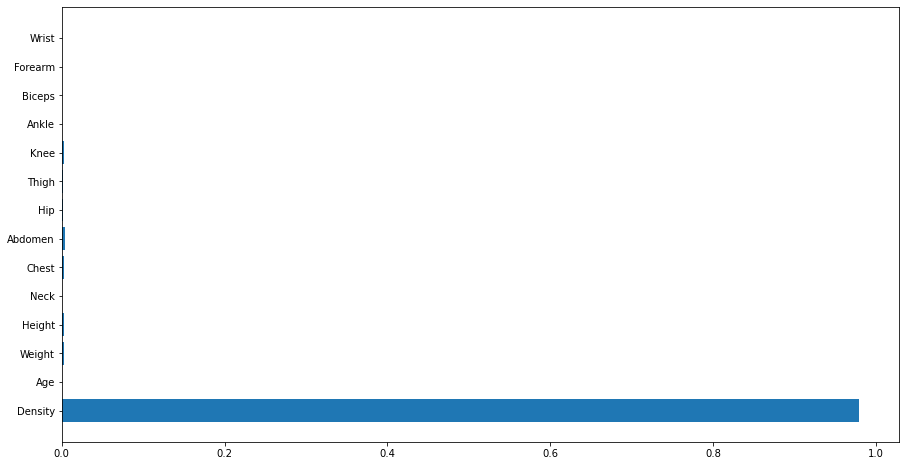

In [13]:
plt.barh(X.columns, rf.feature_importances_)

Text(0.5, 0, 'Random Forest Feature Importance')

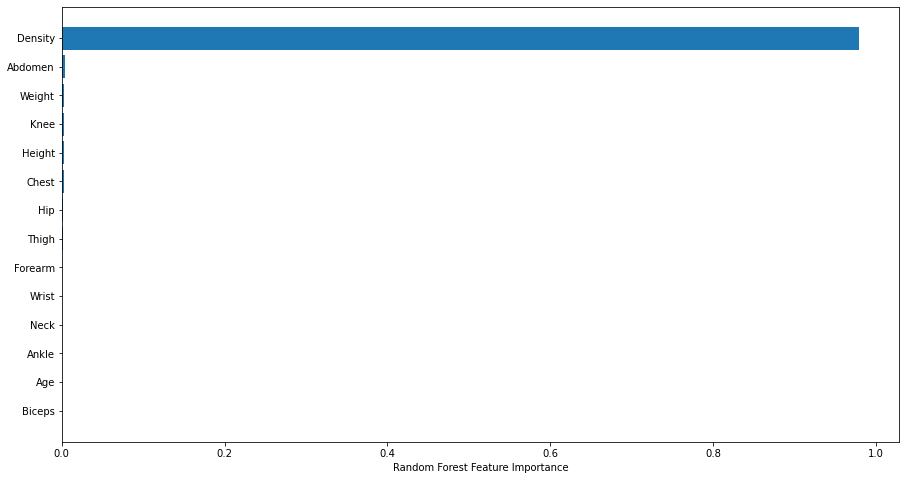

In [14]:
sorted_idx = rf.feature_importances_.argsort()
plt.barh(X.columns[sorted_idx], rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

In [15]:
df.drop(['Ankle','Biceps','Hip','Forearm','Neck','Thigh'], axis=1, inplace=True)

In [27]:
X = df[df.columns.drop('BodyFat')]
y = df1['BodyFat']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

ValueError: Found input variables with inconsistent numbers of samples: [251, 252]

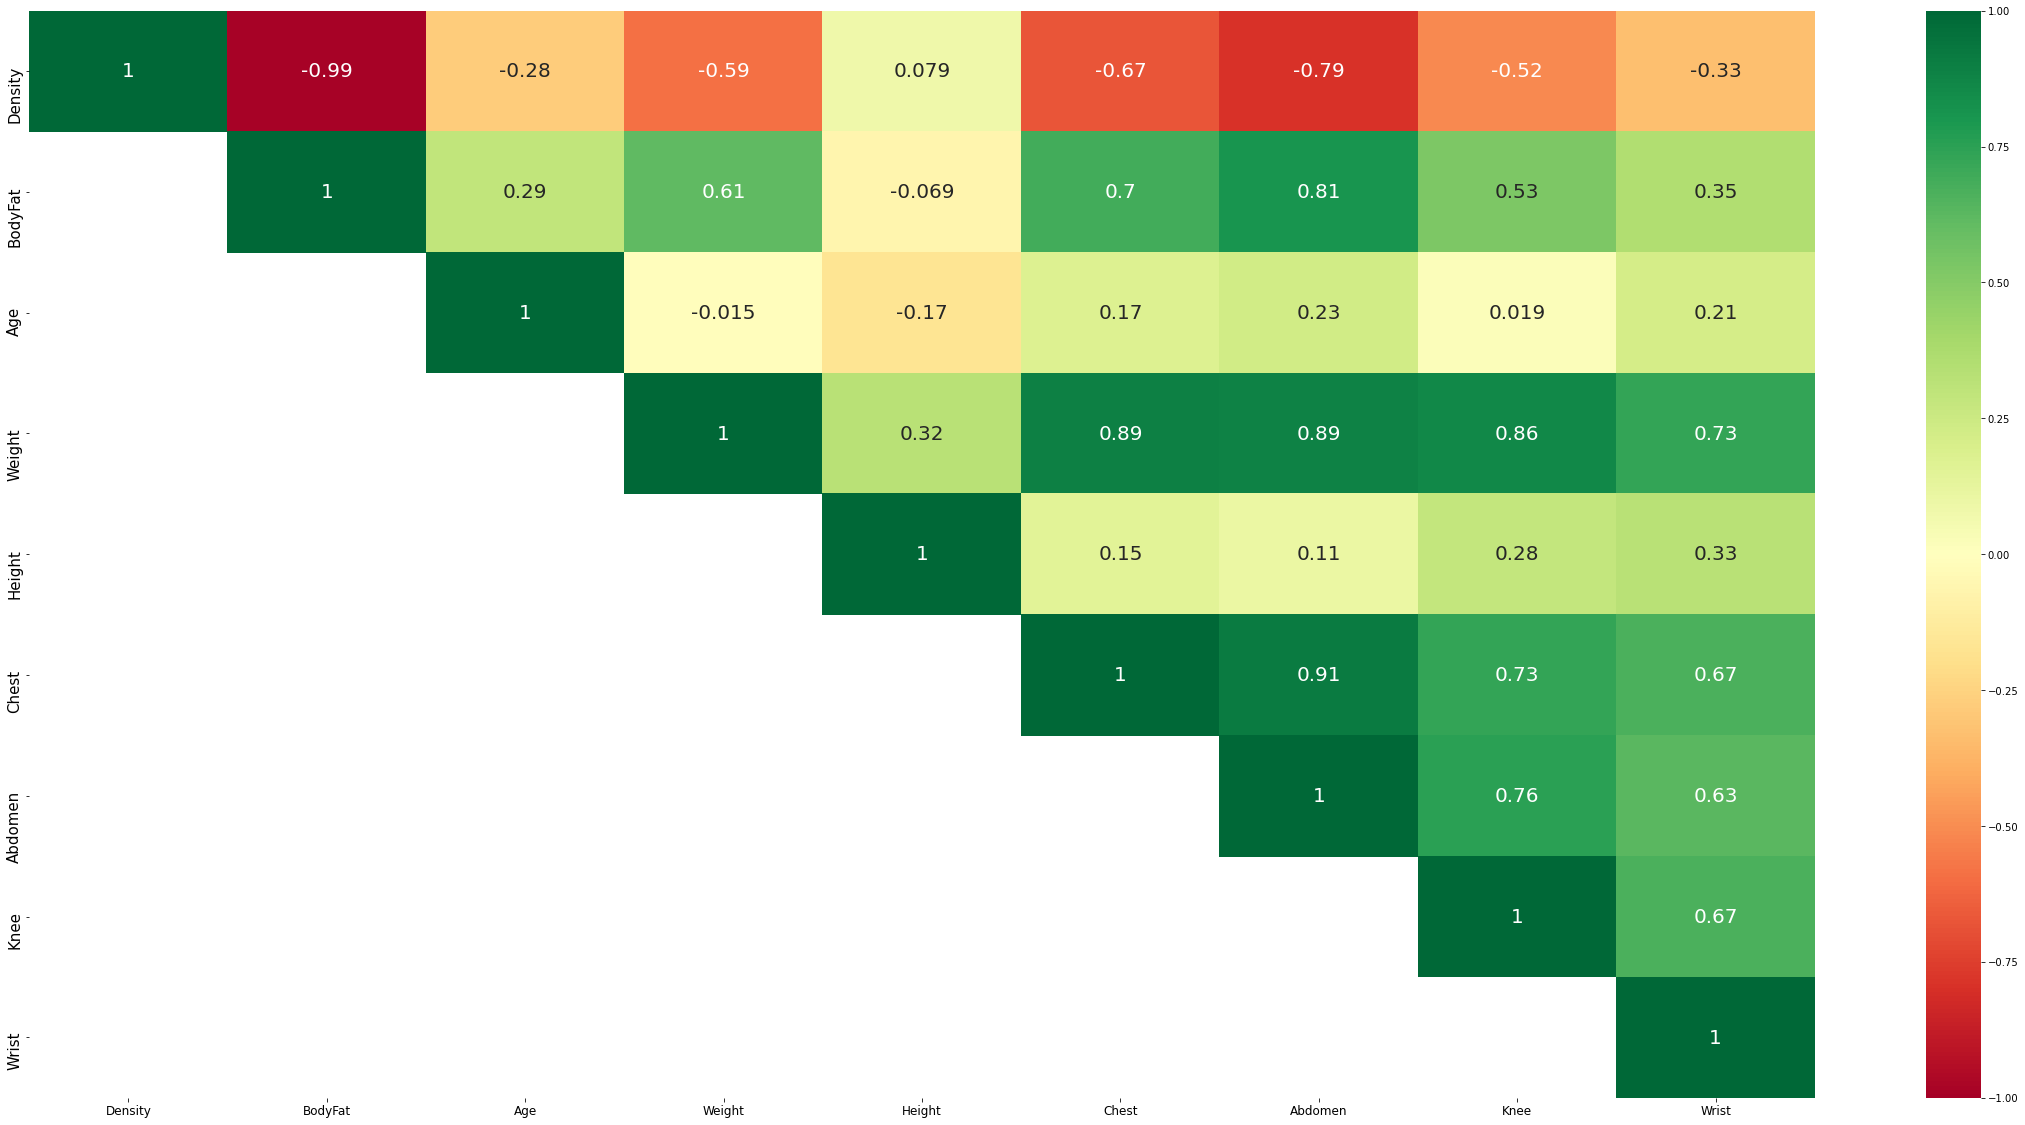

In [28]:
corr = df.corr()
plt.figure(figsize = (40,20))
mask = np.zeros_like(corr)
mask[np.tril_indices_from(mask, k = -1)] = True
sns.heatmap(corr, cmap = 'RdYlGn', vmax = 1.0, vmin = -1.0, annot = True, annot_kws = {"size": 20}, mask = mask)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 15)
plt.show()

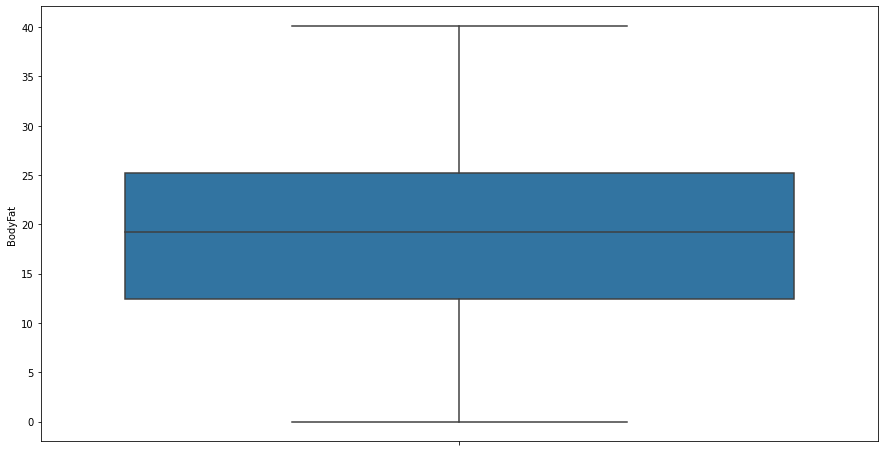

In [29]:
sns.boxplot(y="BodyFat",  data= df)

plt.show()

In [30]:
df.shape

(251, 9)

In [31]:
df = df[df['BodyFat'] < 45]

In [32]:
df.shape

(251, 9)

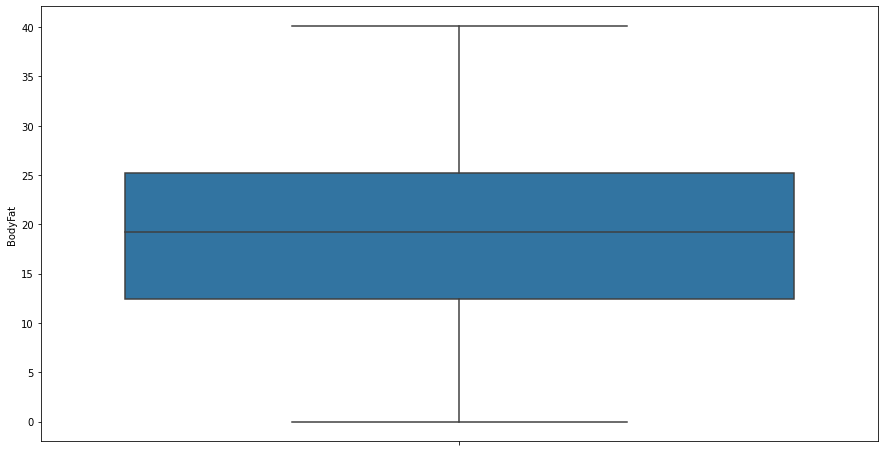

In [33]:
sns.boxplot(y="BodyFat",  data= df)

plt.show()

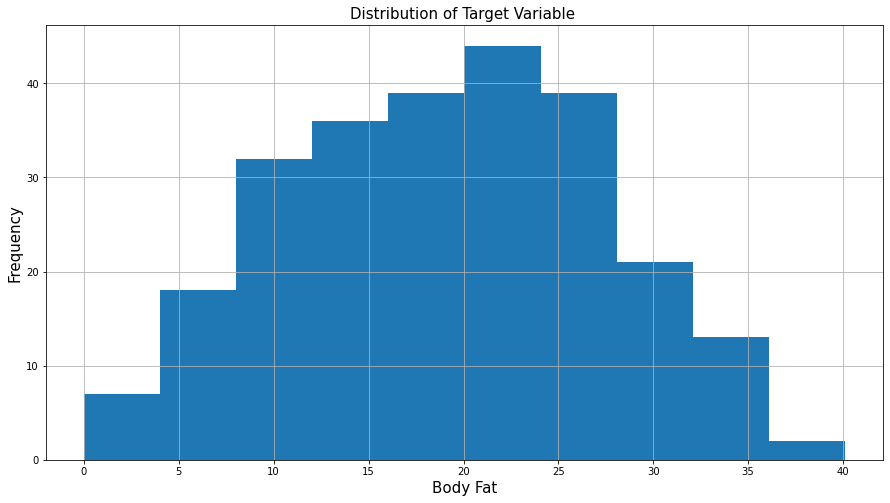

In [34]:
df.BodyFat.hist()

# add plot and axes labels
# set text size using 'fontsize'
plt.title('Distribution of Target Variable ', fontsize = 15)
plt.xlabel('Body Fat', fontsize = 15)
plt.ylabel('Frequency', fontsize = 15)

# display the plot
plt.show()

In [35]:
# normality test using shapiro()
# the test returns the the test statistics and the p-value of the test
stat, p = shapiro(df.BodyFat)

# to print the numeric outputs of the Shapiro-Wilk test upto 3 decimal places
# %.3f: returns the a floating point with 3 decimal digit accuracy
# the '%' holds the place where the number is to be printed
print('Statistics=%.3f, p-value=%.3f' % (stat, p))

# display the conclusion
# set the level of significance to 0.05
alpha = 0.05

# if the p-value is greater than alpha print we accept alpha 
# if the p-value is less than alpha print we reject alpha
if p > alpha:
    print('The data is normally distributed (fail to reject H0)')
else:
    print('The data is not normally distributed (reject H0)')

Statistics=0.990, p-value=0.101
The data is normally distributed (fail to reject H0)


In [36]:
X.head()

,Density,Age,Weight,Height,Chest,Abdomen,Knee,Wrist
0,1.0708,23,154.25,67.75,93.1,85.2,37.3,17.1
1,1.0853,22,173.25,72.25,93.6,83.0,37.3,18.2
2,1.0414,22,154.00,66.25,95.8,87.9,38.9,16.6
3,1.0751,26,184.75,72.25,101.8,86.4,37.3,18.2
4,1.0340,24,184.25,71.25,97.3,100.0,42.2,17.7


In [37]:
linreg_model = sm.OLS(y_train, X_train).fit()

In [38]:
linreg_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                BodyFat   R-squared (uncentered):                   0.972
Model:                            OLS   Adj. R-squared (uncentered):              0.969
Method:                 Least Squares   F-statistic:                              428.6
Date:                Fri, 18 Jun 2021   Prob (F-statistic):                   2.53e-127
Time:                        00:35:04   Log-Likelihood:                         -508.90
No. Observations:                 189   AIC:                                      1046.
Df Residuals:                     175   BIC:                                      1091.
Df Model:                          14                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Density     -106.7324     13.171     -8.104      0.000    -132.727     -80.738
Age            0.0445      0.032      1.401      0.163      -0.018       0.107
Weight        -0.3562      0.048     -7.428      0.000      -0.451      -0.262
Height         0.2229      0.086      2.603      0.010       0.054       0.392
Neck           0.1434      0.229      0.625      0.533      -0.309       0.596
Chest          0.1859      0.102      1.825      0.070      -0.015       0.387
Abdomen        0.7547      0.089      8.484      0.000       0.579       0.930
Hip            0.3778      0.141      2.676      0.008       0.099       0.656
Thigh          0.2040      0.140      1.461      0.146      -0.072       0.480
Knee           0.3412      0.236      1.446      0.150      -0.125       0.807
Ankle          0.5320      0.239      2.230      0.027       0.061       1.003
Biceps         0.2230      0.167      1.334      0.184      -0.107       0.553
Forearm        0.3640      0.210      1.732      0.085      -0.051       0.779
Wrist         -0.4925      0.561     -0.879      0.381      -1.599       0.614
==============================================================================
Omnibus:                        4.167   Durbin-Watson:                   1.645
Prob(Omnibus):                  0.124   Jarque-Bera (JB):                2.634
Skew:                          -0.065   Prob(JB):                        0.268
Kurtosis:                       2.437   Cond. No.                     1.35e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.35e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [39]:
y_pred = linreg_model.predict(X_test)

In [40]:
li_reg_MAE = metrics.mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error (MAE):', li_reg_MAE)

# Calculate MSE
li_reg_MSE = metrics.mean_squared_error(y_test, y_pred)
print('Mean Squared Error (MSE):', li_reg_MSE)

# Calculate RMSE
li_reg_RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error (RMSE):', li_reg_RMSE)

Mean Absolute Error (MAE): 3.121680630307045
Mean Squared Error (MSE): 14.009641755099379
Root Mean Squared Error (RMSE): 3.742945598736292


In [41]:
cols = ['Model', 'MAE', 'MSE', 'RMSE']

# create a empty dataframe of the colums
# columns: specifies the columns to be selected
result_tabulation = pd.DataFrame(columns = cols)

# compile the required information
li_reg_metrics = pd.Series({'Model': "Random Forest ",
                     'MAE':li_reg_MAE,
                     'MSE': li_reg_MSE,
                     'RMSE': li_reg_RMSE     
                   })

# append our result table using append()
# ignore_index=True: does not use the index labels
# python can only append a Series if ignore_index=True or if the Series has a name
result_tabulation = result_tabulation.append(li_reg_metrics, ignore_index = True)

# print the result table
result_tabulation

,Model,MAE,MSE,RMSE
0,Random Forest,3.121681,14.009642,3.742946


In [42]:
rf_reg = RandomForestRegressor(n_estimators=100, random_state=10, warm_start=True, oob_score=True)

# fit the regressor with training dataset
rf_reg.fit(X_train, y_train)

RandomForestRegressor(oob_score=True, random_state=10, warm_start=True)

In [43]:
y_pred1 = rf_reg.predict(X_test)

In [44]:
rf_reg_MAE = metrics.mean_absolute_error(y_test, y_pred1)
print('Mean Absolute Error (MAE):', rf_reg_MAE)

# Calculate MSE
rf_reg_MSE = metrics.mean_squared_error(y_test, y_pred1)
print('Mean Squared Error (MSE):', rf_reg_MSE)

# Calculate RMSE
rf_reg_RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred1))
print('Root Mean Squared Error (RMSE):', rf_reg_RMSE)

Mean Absolute Error (MAE): 0.20107936507936533
Mean Squared Error (MSE): 0.10461403174603168
Root Mean Squared Error (RMSE): 0.323440924661725


In [45]:
rf_reg_metrics = pd.Series({'Model': "Random Forest ",
                     'MAE':rf_reg_MAE,
                     'MSE': rf_reg_MSE,
                     'RMSE': rf_reg_RMSE     
                   })

# append our result table using append()
# ignore_index=True: does not use the index labels
# python can only append a Series if ignore_index=True or if the Series has a name
result_tabulation = result_tabulation.append(rf_reg_metrics, ignore_index = True)

# print the result table
result_tabulation

,Model,MAE,MSE,RMSE
0,Random Forest,3.121681,14.009642,3.742946
1,Random Forest,0.201079,0.104614,0.323441


In [47]:
import pickle
# open a file, where you ant to store the data
file = open('Bodyfat1.pkl', 'wb')

# dump information to that file
pickle.dump(rf_reg, file)